# 개요

- 좋은 성능을 내는 네트워크( 혹은 신경망)를 활용하여 초기 프로젝트시 일정 성능을 낼수 있고, 그 가능성을 가름할수 있다 
- 좋은 모델은 통상적으로 수십/수백개의 레이어를 쌓고, 훈련량도 엄청나다
  - CNN > ResNet 50 > 29시간등 (데이터의 량, 하드웨어(GPU 성능))
  - 좋은 모델을 바로 사용할수 있다면 많은 시간을 단축할수 있고, 기회비용을 높일수 있다 

# 전이학습

- 지식을 재사용
- 처음부터 재학습하지 않고(만들기 나름), 새로운 과제를 해결
- Transfer Learning
  - 하나의 종에서 개인에게 지식을 전달한다는 능력을 보고 만들어진 학습법
  - 기존 모델이 학습을 통해 얻어지는 매개변수을 취하면, 이것이 전이할 정보의 전부이다

# 용어

## pre_Training

- 사전학습, 사전훈련, 전처리과정
- Weight, Bais를 잘 초기화 하는 방법

## Fine Tuning(파인튜닝)

- 기존에 학습된 모델을 기반으로, 아킥텍쳐(신경망구조)를 변형, 가감등 하여서 이미 학습된 모델의 W로부터 학습을 업데이트하는 방법
- 모델의 파라미터를 미세하게 조정하는 행위
- 정교하게 튜닝해라
  - VGG16모델은 1000개의 카테고리를 분류하는 모델
  - 이것을 가져와서 개/고양이를 분류한다면
  - 개와 고양잉 관련되 네트워크만 뽑아서 진행

# 파인 튜닝 모형 (전이학습시 네트워크 모형)

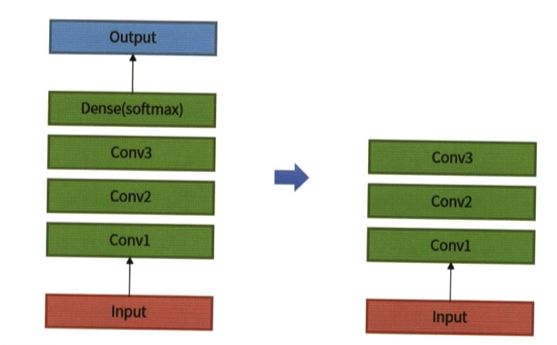

In [1]:
from IPython.display import Image
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/new_res/전이학습-1.png')

# 1. 미리 훈련된 신경망을 가져와서, 마지막 Dense 레이어만 제외(실제 분류하는 양이 1000개, 10개,...)

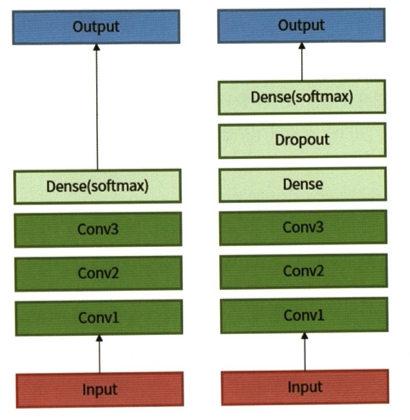

In [2]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/new_res/전이학습-2.png')

# 2.기존 신겸망에 뒷부분을 제외(분류시점), 새롭게 레이어를 추가하는데 좀더 기능을 넣었다
#   후반 작업을 더 추가하여서 신경망 구축

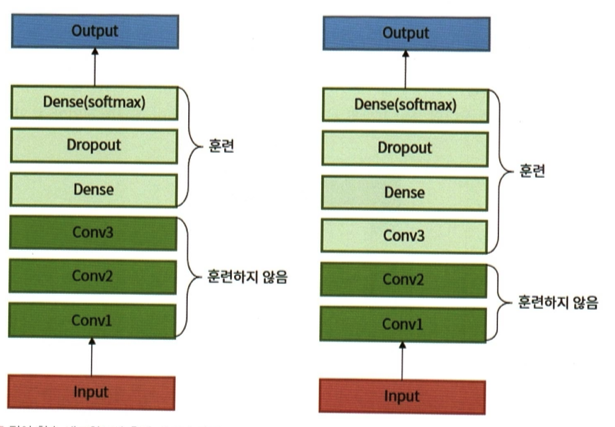

In [3]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/new_res/전이학습-3.png')

# 3. 2번 스타일에서 기존 모델에 있던 내용은 훈련 않함(W,b)를 그대로 사용
#    새로 추가한 부분은 새로운 훈련을 통해서 모델을 완성 (가중치를 유지, 갱신 분리)

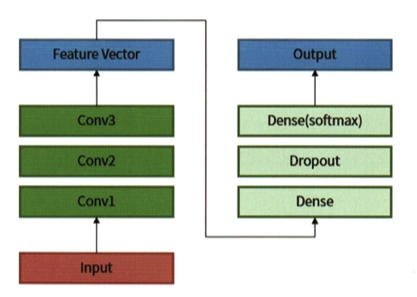

In [4]:
Image('/content/drive/MyDrive/edu.kenshi/2021/품질재단/DL/new_res/전이학습-4.png')

# 4. 기존 신경망 + 새로운 신경망 붙인다

# Tensorflow Hub

- 사전에 학습된 모델을 검색, 제공
- 이미지, 텍스트, 비디오 등등 사전 학습도니 모델 제공
- 텐서플로우, 케라스에서 사용할 전이학습 모델

In [5]:
import tensorflow as tf
import tensorflow_hub as hub

- https://www.tensorflow.org/hub
- tfhub.dev

In [6]:
# 분류가 1000개, 1개는 분류가 되지 않았다-> 0번으로 분류:분류자체가 않되었다
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", output_shape=[1001])
])
# (?, H, W, C), 칼라 이미지를 입력
m.build([None, 224, 224, 3]) 
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


- tensorflow.keras.applications 모듈 활용
- 내장된 전이학습용 모듈 확인

In [7]:
from tensorflow.keras.applications import MobileNetV2

In [8]:
mobilev2 = MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [9]:
mobilev2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

- 기본 API에서 제공하는 전이학습용 모델은 그 레이어 형태를 다 살펴볼수가 있다
- 그러니 허브쪽에 전이학습용 모델은 그 내부가 은닉되어 있다

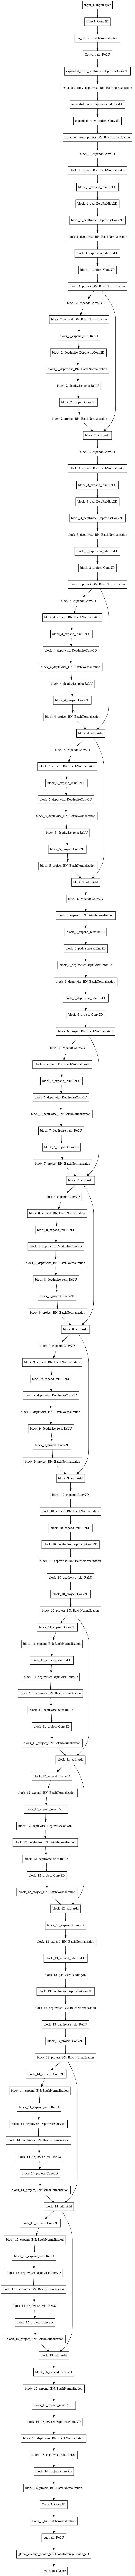

In [10]:
tf.keras.utils.plot_model( mobilev2 )